# Text Analytics  

Natural Language Processing is a vast subject requiring extensive study.  The field is changing quickly, and advancements are being made at an extraordinary speed.

We will cover key concepts at a high level to get you started on a journey of exploration!

## Some basic ideas
### Text as data
Data often comes to us as text.  It contains extremely useful information,  and often what text can tell us,  numerical quantities cannot.  Yet we are challenged to effectively use text data in models,  because models can only accept numbers as inputs.  

Vectorizing text is the process of transforming text into numeric tensors.  

In this discussion on text analytics, we will focus on transforming text into numbers, and using it for modeling.

The first challenge text poses is that it needs to be converted to numbers, ie vectorized, before any ML/AI can consume them.

One way to vectorize text is to use one-hot encoding.

Consider the word list below.

| index | word | 
|--|--|
| 1 | [UNK] | 
| 2 | i | 
| 3 | love | 
| 4 | this | 
| 5 | and | 
| 6 | company | 
| 7 | living | 
| 8 | brooklyn | 
| 9 | new york | 
| 10 | sports | 
| 11 | politics | 
| 12 | entertainment | 
| 13 | in | 
| 14 | theater | 
| 15 | cinema | 
| 16 | travel | 
| 17 | we | 
| 18 | tomorrow | 
| 19 | believe | 
| 20 | the | 

Using the above, the word ‘company’ would be expressed as:  
 >   [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

But how did we come up with this dictionary, and how would we encode an entire sentence?




### Vectorizing Sentences as Sequences:
We build a dictionary of words from our corpus (corpus means a collection of documents), and call it the word index.  We then use the word indexes to create a sequence vector by replacing each word in our given sentence by its corresponding word index number.  

So "I love sports!" =  [2, 3, 10]  (Sentence 1)    

And "I love living in Brooklyn and in New York and some sports" = [2, 3, 7, 13, 8, 5, 13, 9, 5, 1, 10] (Sentence 2)  

### Vectorizing with Document Term Matrices:**  
This can be expressed as a matrix, with the word index numbers along one axis, and the 'documents' along the other.  This is called a ‘Document Term Matrix’, for example, a document term matrix for our hypothetical sentences would look as below:  


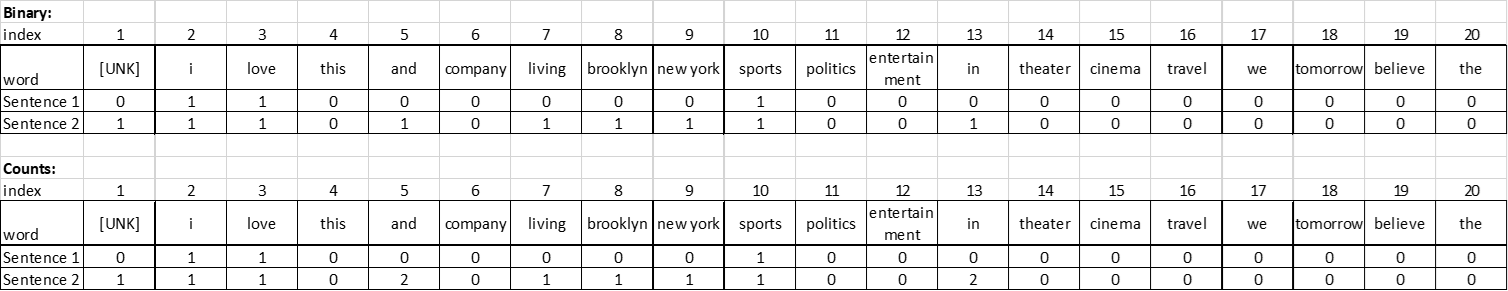

Now this matrix can be used as a numeric input into our modeling exercises.  

### Tokenization  

Think about what we did:  
  - We ignored case  
  - We ignored punctuation  
  - We broke up our sentences into words. This is called tokenization.  The words are our ‘tokens’  

There are other ways to tokenize.  
  - We could have broken the sentence into characters.
  - We could have used groups of 2 words as one token. So ‘I love sports’ would have the tokens ‘I love’ and ‘love sports’.  
  - We could have used 3 words as a token, so ‘I love living in Brooklyn’ would have the tokens ‘I love living’, ‘love living in’, and ‘living in Brooklyn’.  

### N-grams  
Using multiple words as a token is called the n-gram approach, where n is the number of words.  
  - Unigram: When each word is considered a token (most common approach)  
  - Bigram: Two consecutive words taken together  
  - Trigram: Three consecutive words taken together  
  
Bigrams, Trigrams etc help consider words together.
When building the document term matrices, we ignored the word order, and treated each sentence as a set of words.  This is called the ‘bag-of-words’ approach.


### TF-IDF  

**TF-IDF = Term Frequency - Inverse Document Frequency**  
Generally when creating a Document Term Matrix, we would consider the count of times a word appears in a document.  
However, not all words are equally important.  Words that appear in all documents are likely less important than words that are unique to a single or a few documents.  
Stopwords, such as of, and, the, is etc, would likely appear in all documents, and need to be weighted less.  

TF-IDF is the product of term frequency, and the inverse of the document frequency (ie, the count of documents in which the word appears).  

$TFIDF = TF × IDF$, where:   

$TF = Term Frequency$, the number of times a term appears in a document, and

$IDF = idf(t)=log((1+n)/(1+t)+1$
where $n$ is the total number of documents in the document set, and $t$ is the number of documents in the document set that contain term 
Intuitively, the above will have the effect of reducing the impact of common words on our document term matrix

Source: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### Summing it up   
Machine learning models, including deep learning, can only process numeric vectors (tensors).  Vectorizing text is the process of converting text into numeric tensors. Text vectorization processes come in many shapes and form, but they all follow the same template:  

1. First, you pre-process or standardize the text to make it easier to process, for instance by converting it to lowercase or removing punctuation.  
2. Then you split the text into units (called "tokens"), such as characters, words, or groups of words. This is called tokenization.  
3. Finally, you convert each such token into a numerical vector. This almost always involves first indexing all tokens present in the data (the vocabulary, or the dictionary).  You can do this:  

   - using the bag-of-words approach we saw earlier (using a document-term-matrix), or 
   - using word embeddings that attempt to capture the semantic meaning of the text.  


(Source: Adapted from Deep Learning with Python, François Chollet, Manning Publications)

**Next, some library imports**  

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

***
## Text Pre-Processing  
**Common pre-processing tasks:**

Stemming and lemmatization are rarely used anymore as transformers create tokens of sub-words that take care of thia automatically.

  - Stop-word removal – Remove common words such as and, of, the, is etc.
  - Lowercasing all text
  - Removing punctuation
  - Stemming – removing the ends of words as to end up with a common root
  - Lemmatization – looking up words to their true root 

Let us look at some Text Pre-Processing:  

**More library imports** 

In [153]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [154]:
# Needed for NYU Jupyterhub

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [155]:
sentence = "I love living in Brooklyn!!"

**Remove punctuation**

In [156]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [157]:
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation,"")

print(sentence)

I love living in Brooklyn


**Convert to lowercase and remove stopwords**

In [158]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'y', 'are', "wasn't", 'with', 'same', 'theirs', 'hasn', 'her', "shouldn't", 'don', 'have', 'why', 'your', 'doing', 'he', 'couldn', 'these', 'just', 'very', 'but', 'those', 'between', 'into', 'yours', 'under', 'above', 'was', 'were', 'his', 'whom', 'that', 'she', 'about', 'am', 'now', 'further', "aren't", 'has', 'where', 'more', 'does', 'at', 'down', 'doesn', "you're", 'the', 'because', 'isn', 'if', 'than', 'no', 'only', "isn't", 'not', 'while', 'our', 'd', 'having', 'here', 'needn', 'they', 'as', 'by', "you'll", 'what', 'up', 'haven', 'ourselves', 'again', 'before', 'weren', 'aren', 'a', "she's", 'this', 'been', 'should', "mightn't", 'him', 'didn', 'i', "you've", "needn't", 'once', 'is', 'there', 'shan', "wouldn't", "couldn't", 'over', 'mustn', "haven't", 's', 'most', 'wasn', 'such', 'hers', 'for', 'my', "shan't", 'do', "should've", 'm', 'hadn', 'which', 'herself', "hasn't", 'off', 'o', 'yourselves', 'when', 'mightn', 'how', 'during', "don't", 'it', 'we', 'other', 'after', 'through', 

In [159]:
print([i for i in sentence.lower().split() if i not in stopwords])


['love', 'living', 'brooklyn']


### Code for Tokenizing and Creating Sequences with Tensorflow

In [160]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = ["I love living in Brooklyn", "I am not sure if I enjoy politics"]

tokenizer = Tokenizer(oov_token='[UNK]', num_words=None)
tokenizer.fit_on_texts(text)   


In [161]:
# This step transforms each text in texts to a sequence of integers. 
# It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.   

seq = tokenizer.texts_to_sequences(['love I living Brooklyn in state'])  # note 'state' is not in vocabulary
seq

[[3, 2, 4, 6, 5, 1]]

In [162]:
# The dictionary
tokenizer.word_index

{'[UNK]': 1,
 'i': 2,
 'love': 3,
 'living': 4,
 'in': 5,
 'brooklyn': 6,
 'am': 7,
 'not': 8,
 'sure': 9,
 'if': 10,
 'enjoy': 11,
 'politics': 12}

**Document Term Matrix - Counts**

In [163]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - Binary**

In [164]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - TF-IDF**

In [165]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='tfidf')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.510826,0.693147,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.864903,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


**Document Term Matrix based - Frequency**

In [166]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='freq')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.20,0.2,0.2,0.2,0.2,0.000,0.000,0.000,0.000,0.000,0.000
1,0.0,0.25,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.125,0.125,0.125


In [167]:
tokenizer.texts_to_matrix(text, mode='binary')

array([[0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [168]:
new_text = ['There was a person living in Brooklyn', 'I love and enjoy dancing']
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
# Word frequency
pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False)

,0,1
0,i,3
1,love,1
2,living,1
3,in,1
4,brooklyn,1
5,am,1
6,not,1
7,sure,1
8,if,1
9,enjoy,1


In [171]:
# How many docs does the word appear in?
tokenizer.word_docs

defaultdict(int,
            {'i': 2,
             'brooklyn': 1,
             'in': 1,
             'living': 1,
             'love': 1,
             'if': 1,
             'sure': 1,
             'not': 1,
             'am': 1,
             'enjoy': 1,
             'politics': 1})

In [172]:
# How many documents in the corpus
tokenizer.document_count

2

In [173]:
tokenizer.word_index.keys()

dict_keys(['[UNK]', 'i', 'love', 'living', 'in', 'brooklyn', 'am', 'not', 'sure', 'if', 'enjoy', 'politics'])

In [174]:
len(tokenizer.word_index)

12

**Convert text to sequences based on the word index**

In [175]:
seq = tokenizer.texts_to_sequences(new_text)
seq

[[1, 1, 1, 1, 4, 5, 6], [2, 3, 1, 11, 1]]

In [176]:
from tensorflow.keras.utils import pad_sequences

seq = pad_sequences(seq, maxlen = 8)
seq

array([[ 0,  1,  1,  1,  1,  4,  5,  6],
       [ 0,  0,  0,  2,  3,  1, 11,  1]])

In [177]:
depth = len(tokenizer.word_index)

tf.one_hot(seq, depth=depth)

<tf.Tensor: shape=(2, 8, 12), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>

In [178]:
text2 = ['manning pub adt ersa']
# tokenizer.fit_on_texts(text2)  

In [179]:
tokenizer.texts_to_matrix(text2, mode = 'binary')  

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [180]:
tokenizer.texts_to_sequences(text2)

[[1, 1, 1, 1]]

## Wordcloud  
Wordclouds are visual representations of text data.  They work by arranging words in a shape so that words with the highest frequency appear in a larger font.  They are not particularly useful as an analytical tool, except as a visual device to draw attention to key themes.  

Creating wordclouds using Python is relatively simple.  Example below.  


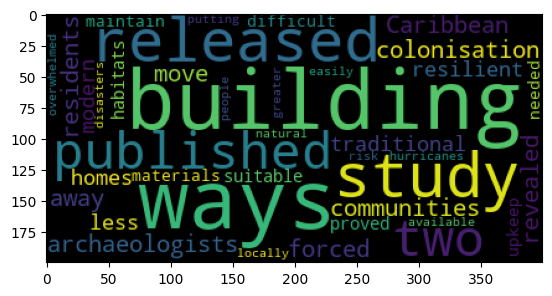

In [181]:
some_text = '''A study released in 2020, published by two 
archaeologists, revealed how colonisation forced 
residents in Caribbean communities to move away 
from traditional and resilient ways of building 
homes to more modern but less suitable ways. These 
habitats have proved to be more difficult to 
maintain, with the materials needed for upkeep not 
locally available, and the buildings easily 
overwhelmed by hurricanes, putting people at 
greater risk during natural disasters.'''

from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_text(some_text))

***
## Topic Modeling

  - Topic modeling, in essence, is a clustering technique to group similar documents together in a single cluster.
  - Topic modeling can be used to find themes across a large corpus of documents as each cluster can be expected to represent a certain theme.
  - The analyst has to specify the number of ‘topics’ (or clusters) to identify.
  - For each cluster that is identified by topic modeling, top words that relate to that cluster can also be reviewed.
  - In practice however, the themes are not always obvious, and trial and error is an extensive part of the topic modeling process.  
  - Topic modeling can be extremely helpful in starting to get to grips with a large data set.
  - Topic Modeling is not based on neural networks, but instead on linear algebra relating to matrix decomposition of the document term matrix for the corpus.
  - Creating the document term matrix is the first step for performing topic modeling.  There are several decisions for the analyst to consider when building the document term matrix.
    - Whether to use a count based or TF-IDF based vectorization for building the document term matrix,
    - Whether to use words, or n-grams, and if n-grams, then what should n be
  - When performing matrix decomposition, again there are decisions to be made around the mathematical technique to use.  The most common ones are:
    - NMF: Non-negative Matrix Factorization
    - LDA: LatentDirichletAllocation

**Matrix Factorization** 
Matrix factorization of the document term matrix gives us two matrices, one of which identifies each document in our list as belonging to a particular topic, and the other gives us the top terms in every topic.  

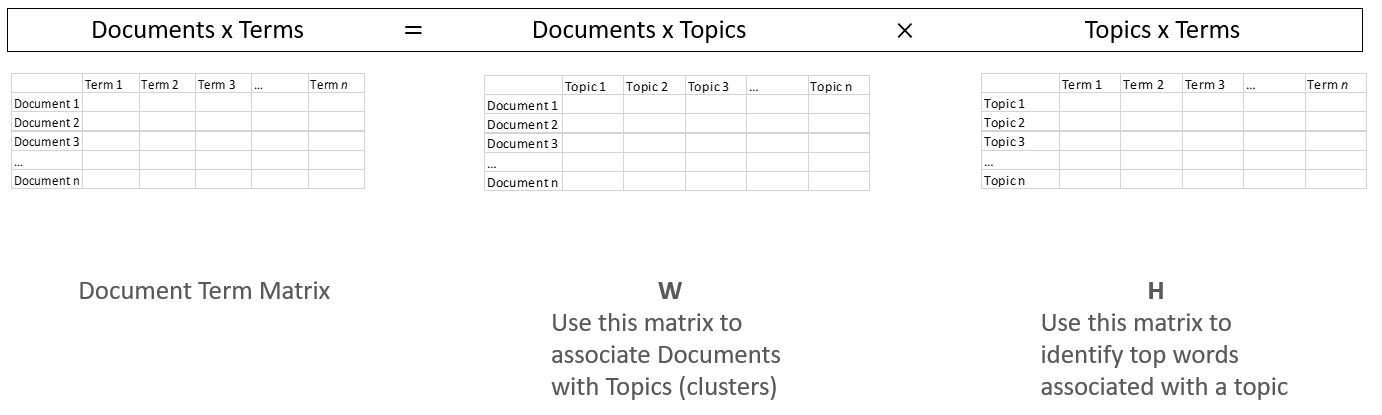


**Topic Modeling in Action**  
Steps:  
1. Load the text data.  Every tweet is a ‘document’, as an entry in a list.
2. Vectorize and create a document term matrix based on count (or TF-IDF).  If required, remove stopwords as part of pre-processing options.  Specify n for if n-grams are to be used instead of words.
3. Pick the model – NMF or LDA – and apply to the document term matrix from step 2.  
  - More information on NMF at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
  - More information on LDA at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 
4. Extract and use the W and H matrices to determine topics and terms.


Load the file 'Corona_NLP_train.csv’ for Corona related tweets, using the column ‘Original Tweet’ as the document corpus.
Cluster the tweets into 10 different topics using both NMF and LDA, and examine the results.

In [182]:
# Regular library imports

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [183]:
# Read the data
# Adapted from source: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

text = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

text = text.sample(10000) # Let us limit to 10000 random articles for illustration purposes

print('text.shape', text.shape)


text.shape (10000, 6)


In [184]:
# Read stopwords from file

custom_stop_words = []
file = open(file = "stopwords.txt", mode = 'r')
custom_stop_words = file.read().split('\n')


**Next, we do topic modeling on the tweets.  The next few cells have the code to do this.**  

It is a lot of code, but let us just take a step back from the code to think about what it does.  

We need to provide it three inputs: 
 - the text,  
 - the number of topics we want identified, and  
 - the value of n for our ngrams.  

Once done, the code below will create two dataframes:  

   - words_in_topics_df - top_n_words per topic  
   - topic_for_doc_df - topic to which a document is identified  

Additional outputs of interest  
- vocab = This is the dict from which you can pull the words, eg vocab['ocean']  
- terms = Just the list equivalent of vocab, indexed in the same order  
- term_frequency_table = dataframe with the frequency of terms  
- doc_term_matrix = Document term matrix  (doc_term_matrix = W x H)  
- W = This matrix has docs as rows and num_topics as columns  
- H = This matrix has num_topics as rows and vocab as columns  

    

In [185]:
# Specify inputs
# Input incoming text as a list called raw_documents

raw_documents= list(text['OriginalTweet'].values.astype('U'))
max_features = 5000 # vocab size
num_topics = 10
ngram = 2 # 2 for bigrams, 3 for trigrams etc

In [186]:
# use count based vectorizer from sklearn

# vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 2, analyzer='word', ngram_range=(ngram, ngram))

# or use TF-IDF based vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features= max_features, stop_words=custom_stop_words, analyzer='word', ngram_range=(ngram, ngram))

# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix in variable doc_term_matrix\n" % (doc_term_matrix.shape[0], doc_term_matrix.shape[1]) )


vocab = vectorizer.vocabulary_ #This is the dict from which you can pull the words, eg vocab['ocean']
terms = vectorizer.get_feature_names_out() #Just the list equivalent of vocab, indexed in the same order
print("Vocabulary has %d distinct terms, examples below " % len(terms))
print(terms[500:550], '\n')

term_frequency_table = pd.DataFrame({'term': terms,'freq': list(np.array(doc_term_matrix.sum(axis=0)).reshape(-1))})
term_frequency_table = term_frequency_table.sort_values(by='freq', ascending=False).reset_index()

freq_df = pd.DataFrame(doc_term_matrix.todense(), columns = terms)
freq_df = freq_df.sum(axis=0)
freq_df = freq_df.sort_values(ascending=False)

Created 10000 X 5000 document-term matrix in variable doc_term_matrix

Vocabulary has 5000 distinct terms, examples below 
['company control' 'company https' 'competition consumer'
 'competition puzzle' 'compiled list' 'complaint online'
 'complaints covid' 'complete lockdown' 'concerns coronavirus'
 'concerns covid' 'concerns grow' 'concerns https' 'conditions workers'
 'confidence plunges' 'confirmed cases' 'confirmed covid'
 'considered essential' 'conspiracy theories' 'conspiracy theory'
 'construction workers' 'consumer activity' 'consumer advice'
 'consumer advocates' 'consumer affairs' 'consumer alert' 'consumer amp'
 'consumer attitudes' 'consumer based' 'consumer behavior'
 'consumer behaviors' 'consumer behaviour' 'consumer brands'
 'consumer business' 'consumer buying' 'consumer centric'
 'consumer christianity' 'consumer communications' 'consumer complaints'
 'consumer confidence' 'consumer coronavirus' 'consumer council'
 'consumer covid' 'consumer covid19' 'consumer credi

In [187]:
# create the model
# Pick between NMF or LDA methods (don't know what they are, try whichever gives better results)

# Use NMF
# model = NMF( init="nndsvd", n_components=num_topics ) 

# Use LDA
model = LatentDirichletAllocation(n_components=num_topics, learning_method='online') 
    
# apply the model and extract the two factor matrices
W = model.fit_transform( doc_term_matrix ) #This matrix has docs as rows and k-topics as columns
H = model.components_ #This matrix has k-topics as rows and vocab as columns
print('Shape of W is', W.shape, 'docs as rows and', num_topics, 'topics as columns. First row below')
print(W[0].round(1))
print('\nShape of H is', H.shape, num_topics, 'topics as rows and vocab as columns. First row below')
print(H[0].round(1))

Shape of W is (10000, 10) docs as rows and 10 topics as columns. First row below
[0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Shape of H is (10, 5000) 10 topics as rows and vocab as columns. First row below
[0.1 0.1 0.1 ... 0.1 0.1 0.1]


In [188]:
# Check which document belongs to which topic, and print value_count
topic_for_doc_df = pd.DataFrame(columns = ['article', 'topic', 'value'])
for i in range(W.shape[0]):
    a = W[i] 
    b = np.argsort(a)[::-1]
    temp_df = pd.DataFrame({'article': [i], 'topic':['Topic_'+str(b[0])], 'value': [a[b[0]]]})
    topic_for_doc_df = pd.concat([topic_for_doc_df, temp_df])

top_docs_for_topic_df = pd.DataFrame(columns = ['topic', 'doc_number', 'weight'])    
for i in range(W.shape[1]):
    topic = i
    temp_df = pd.DataFrame({'topic': ['Topic_'+str(i) for x in range(W.shape[0])], 
                            'doc_number':  list(range(W.shape[0])), 
                            'weight': list(W[:,i])})
    temp_df = temp_df.sort_values(by=['topic', 'weight'], ascending=[True, False])
    top_docs_for_topic_df = pd.concat([top_docs_for_topic_df, temp_df])
# Add text to the top_docs dataframe as a new column
top_docs_for_topic_df['text']=[raw_documents[i] for i in list(top_docs_for_topic_df.doc_number)] 

In [189]:
# Print top two docs for each topic
print('\nTop documents for each topic')
(top_docs_for_topic_df.groupby('topic').head(2))


Top documents for each topic


,topic,doc_number,weight,text
303,Topic_0,303,0.781156,Share profits from low crude oil prices with p...
2050,Topic_0,2050,0.781024,@INCIndia @INCDelhi @KapilSibal @RahulGandhi @...
1288,Topic_1,1288,0.831975,@KariLeeAK907 Wells Fargo is committed to help...
3876,Topic_1,3876,0.831975,@TheIndigoAuthor Wells Fargo is committed to h...
1088,Topic_2,1088,0.812614,.@mcorkery5 @yaffebellany @rachelwharton Scare...
394,Topic_2,394,0.770695,Thank you to those on the front lines\r\r\nTha...
1570,Topic_3,1570,0.804209,@RunwalOfficial Here is my entry team\r\r\n1. ...
574,Topic_3,574,0.796989,Stock markets stabilise as ECB launches Â750b...
612,Topic_4,612,0.797076,@ssupnow 1.Sanitizer\r\r\n2.Italy \r\r\n3.Wuha...
735,Topic_4,735,0.797076,@ssupnow 1. Sanitizer\r\r\n2.Italy \r\r\n3.Wuh...


In [190]:
print('Topic number and counts of documents against each:')
(topic_for_doc_df.topic.value_counts())

Topic number and counts of documents against each:


topic
Topic_9    1545
Topic_5    1089
Topic_3    1059
Topic_4    1010
Topic_1     942
Topic_0     891
Topic_7     881
Topic_8     872
Topic_6     857
Topic_2     854
Name: count, dtype: int64

In [191]:
# Create dataframe with top-10 words for each topic
top_n_words = 10

words_in_topics_df = pd.DataFrame(columns = ['topic', 'words', 'freq'])
for i in range(H.shape[0]):
    a = H[i] 
    b = np.argsort(a)[::-1]
    np.array(b[:top_n_words])
    words = [terms[i] for i in b[:top_n_words]]
    freq = [a[i] for i in b[:top_n_words]]
    temp_df = pd.DataFrame({'topic':'Topic_'+str(i), 'words': words, 'freq': freq})
    words_in_topics_df = pd.concat([words_in_topics_df, temp_df])

print('\n')
print('Top', top_n_words, 'words dataframe with weights')
(words_in_topics_df.head(10))



Top 10 words dataframe with weights


,topic,words,freq
0,Topic_0,oil prices,94.001807
1,Topic_0,stock food,36.748490
2,Topic_0,store employees,28.624253
3,Topic_0,consumer confidence,18.730580
4,Topic_0,commodity prices,17.845095
5,Topic_0,impact covid,16.744839
6,Topic_0,covid lockdown,16.187496
7,Topic_0,healthcare workers,13.657465
8,Topic_0,crude oil,12.088286
9,Topic_0,low oil,11.256529


In [192]:
# print as list
print('\nSame list as above as a list')
words_in_topics_list = words_in_topics_df.groupby('topic')['words'].apply(list)
lala =[]
for i in range(len(words_in_topics_list)):
    a = [list(words_in_topics_list.index)[i]]
    b = words_in_topics_list[i]
    lala = lala + [a+b]
    print(a + b) 
    
    


Same list as above as a list
['Topic_0', 'oil prices', 'stock food', 'store employees', 'consumer confidence', 'commodity prices', 'impact covid', 'covid lockdown', 'healthcare workers', 'crude oil', 'low oil']
['Topic_1', 'online shopping', 'covid19 coronavirus', 'coronavirus pandemic', 'coronavirus outbreak', 'grocery store', 'store workers', 'coronavirus https', 'read https', 'buy food', 'prices coronavirus']
['Topic_2', 'covid19 https', 'local supermarket', 'grocery store', 'price gouging', 'covid consumer', 'supermarket workers', 'coronavirus covid19', 'food prices', 'covid2019 covid19', 'masks gloves']
['Topic_3', 'hand sanitizer', 'covid outbreak', 'coronavirus covid', 'food banks', 'coronavirus https', 'food stock', 'food bank', 'covid19 coronavirus', 'sanitizer coronavirus', 'toilet paper']
['Topic_4', 'coronavirus https', 'toilet paper', 'covid pandemic', 'pandemic https', 'coronavirus covid19', 'consumer behavior', 'coronavirus crisis', 'grocery store', 'toiletpaper https',

In [193]:
# Top terms
print('\nTop 10 most numerous terms:')
term_frequency_table.head(10)


Top 10 most numerous terms:


,index,term,freq
0,1884,grocery store,334.118821
1,722,coronavirus https,183.428248
2,2599,online shopping,137.154044
3,1914,hand sanitizer,134.003798
4,692,coronavirus covid19,117.369948
5,4573,toilet paper,112.075872
6,1038,covid19 coronavirus,103.186951
7,2699,panic buying,95.493730
8,2569,oil prices,93.797117
9,970,covid pandemic,84.856268


***
## Applying ML and AI Algorithms to Text Data

We will use movie reviews as an example to build a model to predict whether the review is positive or negative.  The data already has human assigned labels, so we can try to see if our models can get close to human level performance.

### Movie Review Classification with XGBoost

Let us get some text data to play with.  We will use the IMDB movie review dataset which has 50,000 movie reviews, classified as positive or negative.  

We load the data, and look at some random entries.  

There are 25k positive, and 25k negative reviews.

In [194]:
# Library imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer


In [195]:
# Read the data, create the X and y variables, and look at the dataframe

df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [196]:
# let us look at two random reviews

x = np.random.randint(0, len(df))
print(df['sentiment'][x:x+2])
list(df['review'][x:x+2])

31752    negative
31753    negative
Name: sentiment, dtype: object


["When HEY ARNOLD! first came on the air in 1996, I watched it. It was one of my favorite shows. Then the same episodes started getting shown over and over again so I got tired of waiting for new episodes and stopped watching it. I was sort of surprised when I heard about HEY ARNOLD! THE MOVIE since it doesn't seem to be nearly as popular as some of the other Nickelodeon cartoons like SPONGEBOB SQUAREPANTS. Nevertheless, having nothing better to do, I went to see the movie anyway. Going into the theater, I wasn't expecting much. I was just expecting it to be a dumb movie version of a childrens' cartoon like the RECESS movie was. I guess I got what I expected. It was a dumb kiddie movie and nothing more. There were some good parts here and there, but for the most part, the movie was a stinker. Simply for kids.",
 "I was given this film by my uncle who had got it free with a DVD magazine. Its easy to see why he was so keen to get rid of it. Now I understand that this is a B movie and tha

In [197]:
# We do the train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [198]:
X_train

10258    This was probably the worst movie ever, seriou...
24431    Pointless, humourless drivel.....meant to be a...
48753    Robert Urich was a fine actor, and he makes th...
17995    SPOILERS Every major regime uses the country's...
26318    Screening as part of a series of funny shorts ...
                               ...                        
38536    I say remember where and when you saw this sho...
23686    This really is a great movie. I don't think it...
33455    This was the stupidest movie I have ever seen ...
49845    The viewer who said he was disappointed seems ...
35359    I was required to watch the movie for my work,...
Name: review, Length: 40000, dtype: object

**Approach**  
Extract a vocabulary from the training text, and give each word a number index.  

Take the top 2000 words from this vocab, and convert all tweets into a numerical vector by putting a "1" in the position for a word if that word appears in the tweet.  Words not in the vocab get mapped to [UNK]=1. 

Construct a Document Term Matrix (which can be binary, or counts, or TFIDF).  This is the array we use for X.  


In [199]:
# We tokenize the text based on the training data

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='[UNK]', num_words=2000)

tokenizer.fit_on_texts(X_train)   

In [200]:
# let us look around the tokenized data


# Word frequency from the dictionary (tokenizer.word_counts())
print('Top words\n', pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False).head(20).reset_index(drop=True))


# How many documents in the corpus
print('\nHow many documents in the corpus?', tokenizer.document_count)

      
print('Total unique words', len(tokenizer.word_index))

Top words
         0       1
0     the  534055
1     and  259253
2       a  258265
3      of  231637
4      to  214715
5      is  168556
6      br  161759
7      in  149238
8      it  125474
9       i  124199
10   this  120642
11   that  109456
12    was   76660
13     as   73285
14   with   70104
15    for   69944
16  movie   69849
17    but   66850
18   film   62227
19     on   54346

How many documents in the corpus? 40000
Total unique words 112271


In [201]:
# We can also look at the word_index
# But it is very long, and we will not 
# print(tokenizer.word_index)

# Let us print the first 20
list(tokenizer.word_index.items())[:20]

[('[UNK]', 1),
 ('the', 2),
 ('and', 3),
 ('a', 4),
 ('of', 5),
 ('to', 6),
 ('is', 7),
 ('br', 8),
 ('in', 9),
 ('it', 10),
 ('i', 11),
 ('this', 12),
 ('that', 13),
 ('was', 14),
 ('as', 15),
 ('with', 16),
 ('for', 17),
 ('movie', 18),
 ('but', 19),
 ('film', 20)]

In [202]:
# Next, we convert the tokens to a document term matrix
X_train = tokenizer.texts_to_matrix(X_train, mode='binary')
X_test = tokenizer.texts_to_matrix(X_test, mode='binary')

In [203]:
print('X_train.shape', X_train.shape)
X_train[198:202]

X_train.shape (40000, 2000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [204]:
print('y_train.shape', y_train.shape)
y_train[198:202]

y_train.shape (40000,)


47201    negative
13200    negative
27543    negative
10792    negative
Name: sentiment, dtype: object

In [205]:
# let us encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array


In [206]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [207]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [208]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking accuracy on the training set

In [209]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     20020
           1       0.92      0.94      0.93     19980

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



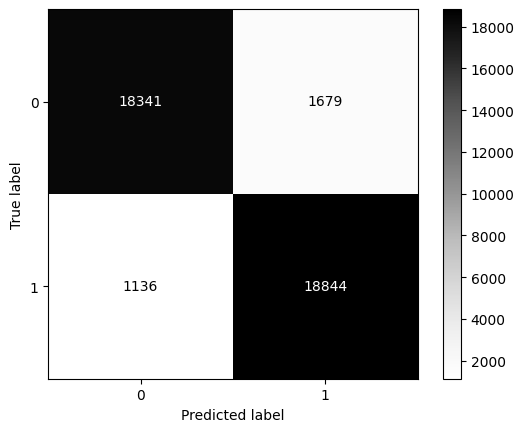

In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [211]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.942, 0.058],
       [0.543, 0.457],
       [0.092, 0.908],
       ...,
       [0.094, 0.906],
       [0.992, 0.008],
       [0.778, 0.222]], dtype=float32)

#### Checking accuracy on the test set

In [212]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4980
           1       0.85      0.87      0.86      5020

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



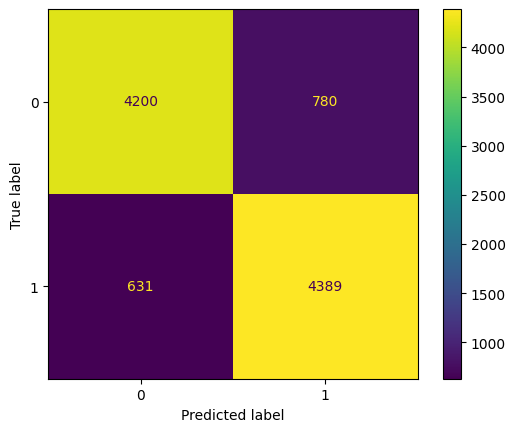

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);

#### Is our model doing any better than a naive classifier?

In [214]:
from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.5005

In [215]:
dummy_clf.predict_proba(X_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])


**'prior'** and **'most_frequent'** are identical except how probabilities are returned.
`'most_frequent'` returns one-hot probabilities, while `'prior'` returns actual probability values.


In [216]:

from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.5005

In [217]:
dummy_clf.predict_proba(X_train)

array([[0.5005, 0.4995],
       [0.5005, 0.4995],
       [0.5005, 0.4995],
       ...,
       [0.5005, 0.4995],
       [0.5005, 0.4995],
       [0.5005, 0.4995]])

In [218]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.500775

In [219]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.496475

***
### Movie Review Classification using a Fully Connected NN

In [220]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Input, LSTM
from tensorflow import keras

model = keras.Sequential()

model.add(Input(shape=(X_train.shape[1],))) # INPUT layer
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4004001 (15.27 MB)
Trainable params: 4004001 (15.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [221]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, batch_size=1000, validation_split=0.2, callbacks= [callback])

Epoch 1/15
32/32 [==============================] - 3s 71ms/step - loss: 0.6622 - acc: 0.6610 - val_loss: 0.4310 - val_acc: 0.7997
Epoch 2/15
32/32 [==============================] - 2s 73ms/step - loss: 0.4121 - acc: 0.8217 - val_loss: 0.4147 - val_acc: 0.8136
Epoch 3/15
32/32 [==============================] - 2s 63ms/step - loss: 0.3246 - acc: 0.8632 - val_loss: 0.2847 - val_acc: 0.8783
Epoch 4/15
32/32 [==============================] - 2s 65ms/step - loss: 0.2862 - acc: 0.8817 - val_loss: 0.3067 - val_acc: 0.8675
Epoch 5/15
32/32 [==============================] - 2s 73ms/step - loss: 0.2598 - acc: 0.8922 - val_loss: 0.2817 - val_acc: 0.8805
Epoch 6/15
32/32 [==============================] - 2s 72ms/step - loss: 0.2360 - acc: 0.9057 - val_loss: 0.4050 - val_acc: 0.8210
Epoch 7/15
32/32 [==============================] - 2s 63ms/step - loss: 0.2078 - acc: 0.9163 - val_loss: 0.3457 - val_acc: 0.8618
Epoch 8/15
32/32 [==============================] - 2s 64ms/step - loss: 0.1881 - a

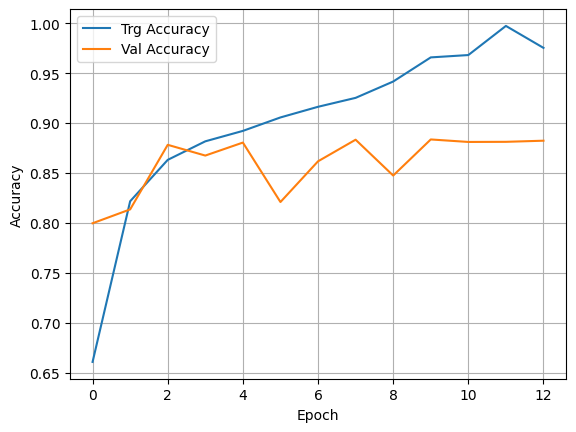

In [222]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [223]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 3s 9ms/step


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4980
           1       0.88      0.88      0.88      5020

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



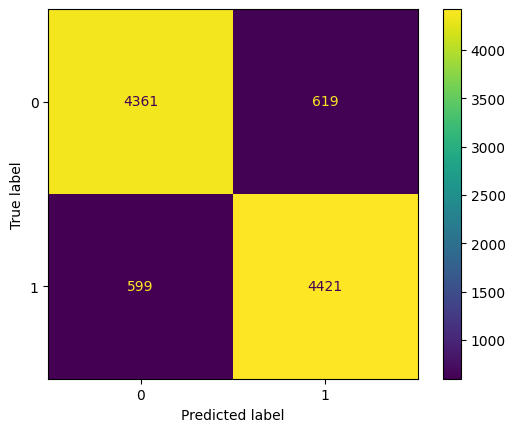

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred);

***
### Movie Review Classification Using an Embedding Layer
**Tensorflow Text Vectorization and LSTM network**  

In [383]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [384]:
max([len(review) for review in X])

13704

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [386]:
X_train

46607    This movie is bad as we all knew it would be. ...
14863    Since I am not a big Steven Seagal fan, I thou...
37844    The night of the prom: the most important nigh...
3261     This is one worth watching, although it is som...
15958    Decent enough with some stylish imagery howeve...
                               ...                        
44194    Guns blasting, buildings exploding, cars crash...
25637    The Poverty Row horror pictures of the 1930s a...
37494    i have one word: focus.<br /><br />well.<br />...
45633    For a movie that was the most seen in its nati...
27462    Nine out of ten might seem like a high mark to...
Name: review, Length: 40000, dtype: object

**Next, we convert our text data into arrays that neural nets can consume.  
These will be used by the several different architectures we will try next.**  

In [387]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import numpy as np

maxlen=500  # how many words to take from each text
vocab_size=20000 # the size of our vocabulary

# First, we tokenize our training text
tokenizer = Tokenizer(num_words = vocab_size, oov_token='[UNK]')
tokenizer.fit_on_texts(X_train)

# Create sequences and then the X_train vector
sequences_train = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
X_train = pad_sequences(sequences_train, maxlen = maxlen)

# Same thing for the y_train vector
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen = maxlen)

# let us encode the labels as 0s and 1s instead of positive and negative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
print('Classes', dict(list(enumerate(le.classes_))), '\n')

# Now our y variable contains numbers.  Let us one-hot them using Label Binarizer
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train) 
# y_test = lb.fit_transform(y_test) 


print('Shape of X_train tensor', X_train.shape)
print('Shape of y_train tensor', y_train.shape)
print('Shape of X_test tensor', X_test.shape)
print('Shape of y_test tensor', y_test.shape)






Found 111991 unique tokens
Classes {0: 'negative', 1: 'positive'} 

Shape of X_train tensor (40000, 500)
Shape of y_train tensor (40000,)
Shape of X_test tensor (10000, 500)
Shape of y_test tensor (10000,)


In [388]:
# We can print the word index if we wish to, 
# but be aware it will be a long list

# print(tokenizer.word_index)

In [389]:
X_train[np.random.randint(0,len(X_train))]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [390]:
pd.DataFrame(X_train).sample(6).reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,576,30,2,12767,10,7,404,280,4,104
1,1129,3,8604,267,31,88,29,540,693,6,...,18,7,1661,508,19,92,728,7,2005,2868
2,0,0,0,0,0,0,0,0,0,0,...,761,2217,146,129,4,334,19,12,18,2078
3,0,0,0,0,0,0,0,0,0,0,...,319,190,1,4992,62,108,403,9,58,657
4,0,0,0,0,0,0,0,0,0,0,...,39,1,204,8,8,702,1059,43,5,162
5,463,610,61,3818,100,3707,5,3300,57,2,...,910,5,12,20,2131,224,160,6,1780,12


In [391]:
word_index['the']

2

**Build the model**  

In [392]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [393]:
vocab_size=20000 # vocab size
embedding_dim = 100 # 100 dense vector for each word from Glove
max_len = 350 # using only first 100 words of each review

In [394]:
# In this model, we do not use pre-trained embeddings, but let the machine train the embedding weights too
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim)) 
# Note that vocab_size=20000 (vocab size), 
# embedding_dim = 100 (100 dense vector for each word from Glove), 
# maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         2000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2017057 (7.69 MB)
Trainable params: 2017057 (7.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
**Know that the model in the next cell will take over 30 minutes to train!**

In [395]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_split=0.2, callbacks=[callback])


Epoch 1/4
32/32 [==============================] - 205s 6s/step - loss: 0.6902 - acc: 0.5633 - val_loss: 0.6844 - val_acc: 0.5804
Epoch 2/4
32/32 [==============================] - 205s 6s/step - loss: 0.6325 - acc: 0.6648 - val_loss: 0.5204 - val_acc: 0.7788
Epoch 3/4
32/32 [==============================] - 239s 7s/step - loss: 0.4872 - acc: 0.7835 - val_loss: 0.4194 - val_acc: 0.8183
Epoch 4/4
32/32 [==============================] - 268s 8s/step - loss: 0.4075 - acc: 0.8272 - val_loss: 0.3781 - val_acc: 0.8497
CPU times: total: 4min 5s
Wall time: 15min 17s


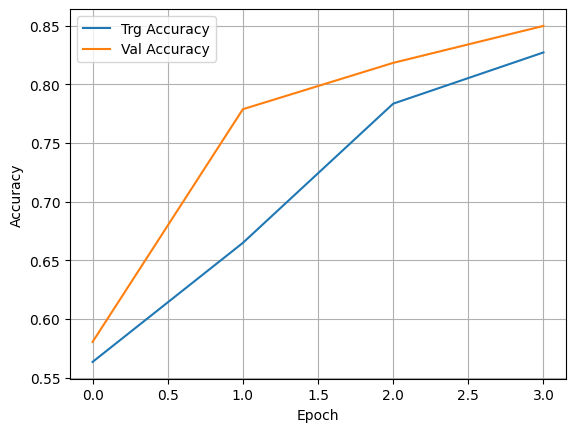

In [396]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [266]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 19s 58ms/step


              precision    recall  f1-score   support

           0       0.67      0.49      0.57      4977
           1       0.60      0.76      0.67      5023

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000



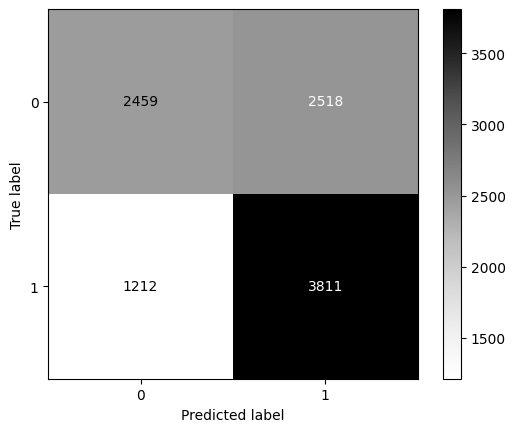

In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

**Now imagine you are trying to extract the embedding layer that was just trained.**

In [268]:
extracted_embeddings = model.layers[0].get_weights()[0]

In [269]:
extracted_embeddings.shape

(400000, 100)

**Let us look at one embedding for the word king**  

In [270]:
word_index['king']

775

In [271]:
extracted_embeddings[786]

array([ 1.3209e-01,  3.5960e-01, -8.8737e-01,  2.7783e-01,  7.7730e-02,
        5.0430e-01, -6.9240e-01, -4.4459e-01, -1.5690e-02,  1.1756e-01,
       -2.7386e-01, -4.4490e-01,  3.2509e-01,  2.6632e-01, -3.9740e-01,
       -7.9876e-01,  8.8430e-01, -2.7764e-01, -4.9034e-01,  2.4787e-01,
        6.5317e-01, -3.0958e-01,  1.1355e+00, -4.1698e-01,  5.0095e-01,
       -5.9535e-01, -5.2481e-01, -5.9037e-01, -1.2094e-01, -5.3686e-01,
        3.4284e-01,  6.7085e-03, -5.8017e-02, -2.5796e-01, -5.2879e-01,
       -4.7686e-01,  1.0789e-01,  1.3395e-01,  4.0291e-01,  7.6654e-01,
       -1.0078e+00,  3.6488e-02,  2.3898e-01, -5.6795e-01,  1.6713e-01,
       -3.5807e-01,  5.6463e-01, -1.5489e-01, -1.1677e-01, -5.7334e-01,
        4.5884e-01, -3.7997e-01, -2.9437e-01,  9.1430e-01,  2.7176e-01,
       -1.0860e+00,  7.2911e-02, -6.7229e-01,  2.3464e+00,  7.8156e-01,
       -2.2578e-01,  2.2451e-01, -1.4692e-01, -8.0253e-01,  7.5884e-01,
       -3.6457e-01, -2.9648e-01,  1.1128e-01,  2.5005e-01,  7.65

**Predicting for a new review**

In [272]:
new_review = 'The movie is awful garbage hopeless useless no good'
sequenced_review = tokenizer.texts_to_sequences([new_review])
sequenced_review

[[2, 18, 7, 370, 1170, 4994, 3108, 55, 50]]

In [273]:
padded_review = pad_sequences(sequenced_review, maxlen = maxlen)
predicted_class = model.predict(padded_review)
predicted_class

1/1 [==============================] - 0s 55ms/step


array([[0.40593678]], dtype=float32)

In [274]:
pred = (predicted_class>0.5)*1
int(pred)

C:\Users\user\AppData\Local\Temp\ipykernel_24824\2909965089.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(pred)


0

In [275]:
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [276]:
dict(list(enumerate(le.classes_)))[int(pred)]

C:\Users\user\AppData\Local\Temp\ipykernel_24824\2478111763.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dict(list(enumerate(le.classes_)))[int(pred)]


'negative'

***
### Movie Review Classification Using Pre-trained Glove Embeddings

**First, load the Glove embeddings**

In [281]:
pwd

'C:\\Users\\user\\Google Drive\\jupyter'

In [282]:
embeddings_index = {}

f=open(r"C:\Users\user\Google Drive\glove.6B\glove.6B.100d.txt", encoding="utf8") # For personal machine
# f=open(r"/home/instructor/shared/glove.6B.100d.txt", encoding="utf8") # For Jupyterhub at NYU
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s words and corresponding vectors' % len(embeddings_index))
vocab_size = len(embeddings_index)

Found 400000 words and corresponding vectors


In [283]:
# Print the embeddings_index (if needed)

# embeddings_index

In [284]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [285]:
len(embeddings_index.get('security'))

100

In [286]:
print(embeddings_index.get('th13e'))

None


In [287]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

In [288]:
list(embeddings_index.keys())[3]

'of'

In [289]:
vocab_size

400000

In [290]:
# Create the embedding matrix based on Glove
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for i, word in enumerate(list(embeddings_index.keys())):
    # print(word,i)
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [291]:
embedding_matrix.shape

(400000, 100)

In [292]:
embedding_matrix[0]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

At this point the `embedding_matrix` has one row per word in the vocabulary.  Each row has the vector for that word, picked from glove.  Because it is an np.array, it has no row or column names. The order of the words in the rows is the same as the order of words in the dict embeddings_index.  
  
We will feed this embedding matrix as weights to the embedding layer.  
  
**Build the model:**    

In [293]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [294]:
# let us use pretrained Glove embeddings

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                    trainable=False,mask_zero=True )) # Note that vocab_size=20000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32, name='LSTM_Layer'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         40000000  
                                                                 
 LSTM_Layer (LSTM)           (None, 32)                17024     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 40017057 (152.65 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 40000000 (152.59 MB)
_________________________________________________________________


In [ ]:
# Takes 30 minutes to train

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=1024, validation_split=0.2, callbacks=[callback])


In [ ]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

***
**CAREFUL WHEN RUNNING ON JUPYTERHUB!!!**
Jupyterhub may crash, or will not have the storage space to store the pretrained models.  If you wish to test this out, run it on your own machine.

## Word2Vec
### Using pre-trained embeddings

You can list all the different types of pre-trained embeddings you can download from Gensim

In [296]:
# import os
# os.environ['GENSIM_DATA_DIR'] = '/home/instructor/shared/gensim'

In [397]:
# Source: https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html

import gensim.downloader as api
info = api.info()

for model_name, model_data in sorted(info['models'].items()):
    print(
        '%s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'][:40] + '...',
        )
    )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-300 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-50 (400000 records): Pre-trained vectors based on Wikipedia 2...
word2vec-google-news-300 (3000000 records): Pre-trai

In [398]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50')

In [399]:
wv.similarity('ship', 'boat')

0.89015037

In [400]:
wv.similarity('up', 'down')

0.9523452

In [401]:
wv.most_similar(positive=['car'], topn=5)

[('truck', 0.92085862159729),
 ('cars', 0.8870189785957336),
 ('vehicle', 0.8833683729171753),
 ('driver', 0.8464019298553467),
 ('driving', 0.8384189009666443)]

In [402]:
# king - queen = princess - prince
# king = + queen + princess - prince
wv.most_similar(positive=['queen', 'prince'], negative = ['princess'], topn=5)

[('king', 0.8574749827384949),
 ('patron', 0.7256798148155212),
 ('crown', 0.7167519330978394),
 ('throne', 0.7129824161529541),
 ('edward', 0.7081639170646667)]

In [302]:
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'car'

In [303]:
wv['car'].shape

(50,)

In [304]:
wv['car']

array([ 0.47685 , -0.084552,  1.4641  ,  0.047017,  0.14686 ,  0.5082  ,
       -1.2228  , -0.22607 ,  0.19306 , -0.29756 ,  0.20599 , -0.71284 ,
       -1.6288  ,  0.17096 ,  0.74797 , -0.061943, -0.65766 ,  1.3786  ,
       -0.68043 , -1.7551  ,  0.58319 ,  0.25157 , -1.2114  ,  0.81343 ,
        0.094825, -1.6819  , -0.64498 ,  0.6322  ,  1.1211  ,  0.16112 ,
        2.5379  ,  0.24852 , -0.26816 ,  0.32818 ,  1.2916  ,  0.23548 ,
        0.61465 , -0.1344  , -0.13237 ,  0.27398 , -0.11821 ,  0.1354  ,
        0.074306, -0.61951 ,  0.45472 , -0.30318 , -0.21883 , -0.56054 ,
        1.1177  , -0.36595 ], dtype=float32)

In [305]:
# # Create the embedding matrix based on Word2Vec
# # The code below is to be used if Word2Vec based embedding is to be applied
# embedding_dim = 300
# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         try:
#             embedding_vector = wv[word]
#         except:
#             pass
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector
 

### Train your own Word2Vec model

Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [403]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [404]:
text = X.str.split()
text

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [405]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=text, vector_size=100)

CPU times: total: 26.9 s
Wall time: 40.7 s


In [309]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/76833 is the
word #1/76833 is a
word #2/76833 is and
word #3/76833 is of
word #4/76833 is to
word #5/76833 is is
word #6/76833 is in
word #7/76833 is I
word #8/76833 is that
word #9/76833 is this


In [406]:
model.wv.most_similar(positive=['plot'], topn=5)

[('storyline', 0.8543968200683594),
 ('plot,', 0.8056776523590088),
 ('story', 0.802429735660553),
 ('premise', 0.7813816666603088),
 ('script', 0.7293688058853149)]

In [407]:
model.wv.most_similar(positive=['picture'], topn=5)

[('film', 0.7576208710670471),
 ('movie', 0.6812320947647095),
 ('picture,', 0.6758107542991638),
 ('picture.', 0.6578809022903442),
 ('film,', 0.6539871692657471)]

In [408]:
model.wv.doesnt_match(['violence', 'comedy', 'hollywood', 'action', 'tragedy', 'mystery'])

'hollywood'

In [409]:
model.wv['car']

array([ 3.1449692 , -0.39300188, -2.8793733 ,  0.81913537,  0.77710867,
        1.9704189 ,  1.9518538 ,  1.3401624 ,  2.3002717 , -0.78068906,
        2.6001053 , -1.4306034 , -2.0606415 , -0.81759864, -1.1708962 ,
       -1.9217126 ,  2.0415769 ,  1.4932067 ,  0.3880995 , -1.3104165 ,
       -0.15956941, -1.3804387 ,  0.14109041, -0.22627166,  0.45242438,
       -3.0159416 ,  0.04276123,  3.0331874 ,  0.10387604,  1.3252492 ,
       -1.8569818 ,  1.3073022 , -1.6328144 , -3.057891  ,  0.72780824,
        0.21530072,  1.9433893 ,  1.5551361 ,  1.0013666 , -0.42748117,
       -0.26814938,  0.5390401 ,  0.3090155 ,  1.7869114 , -0.03897431,
       -1.0120239 , -1.3983582 , -0.80465245,  1.2796128 , -1.1782562 ,
       -1.2813599 , -0.7778636 , -2.4901724 , -1.1968515 , -1.2082913 ,
       -2.0833914 , -0.5734331 , -0.18420309,  2.0139825 ,  1.0056669 ,
       -2.3303485 , -1.042126  ,  0.64415103, -0.85369444, -0.43789923,
        0.63325334,  1.0096568 ,  0.75676817, -1.0522991 , -0.45

In [314]:
# model.wv.key_to_index 

list(model.wv.key_to_index.items())[:20]

[('the', 0),
 ('a', 1),
 ('and', 2),
 ('of', 3),
 ('to', 4),
 ('is', 5),
 ('in', 6),
 ('I', 7),
 ('that', 8),
 ('this', 9),
 ('it', 10),
 ('/><br', 11),
 ('was', 12),
 ('as', 13),
 ('with', 14),
 ('for', 15),
 ('The', 16),
 ('but', 17),
 ('on', 18),
 ('movie', 19)]

In [315]:
model.wv.index_to_key[:20]

['the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'I',
 'that',
 'this',
 'it',
 '/><br',
 'was',
 'as',
 'with',
 'for',
 'The',
 'but',
 'on',
 'movie']

### Identify text that is similar

We will calculate the similarity between vectors to identify the most similar reviews.

Before we do it for everything, let us pick two random reviews and compute the similarity between them.

To make things simpler, first let us reduce the size of our dataset to 5,000 reviews (instead of 50,000)

In [410]:
df = df.sample(5000) # We limit, for illustration, to 1000 random reviews

In [411]:
df.review.iloc[2]

'Critics are falling over themselves within the Weinstein\'s Sphere of Influence to praise this ugly, misguided and repellent adaptation of the lyrical novel on which it\'s based. Minghella\'s ham-fisted direction of the egregiously gory and shrill overly-episodic odyssey is one of the many missteps of this "civil-war love story". Are they kidding? After Ms. Kidman and Mr. Law meet cute with zero screen chemistry in a small North Carolina town and steal a kiss before its off to war for Jude and his photo souvenir of the girl he left behind, it\'s a two hour test to the kidneys as to whether he will survive a myriad of near-death experiences to reunite with his soulmate. Who cares? Philip S. Hoffman\'s amateurish scene chewing in a disgusting and unfunny role pales to Renee Zelweger\'s appearance as a corn-fed dynamo who bursts miraculously upon the scene of Kidman\'s lonely farm to save the day. Rarely has a performance screamed of "look at me, I\'m acting" smugness. Her sheer deafenin

In [412]:
df.review.iloc[20]

'Amongst the standard one liner type action films, where acting and logic are checked at the door, this movie is at the top of the class. If the person in charge of casting were to have put "good" actors in this flick, it would have been worse(excepting Richard Dawson who actually did act well, if you can call playing yourself "acting"). I love this movie! The Running Man is in all likelihood God\'s gift to man(okay maybe just men). Definitely the most quotable movie of our time so I\'ll part you with my favorite line: "It\'s all part of life\'s rich pattern Brenda, and you better F*****g get used to it." Ahh, more people have been called "Brenda" for the sake of quoting this film than I can possibly imagine.'

In [319]:
# We take the above reviews and split by word, and put them in a list
# Word2vec will need these as a list

first = [x for x in df.review.iloc[2].split() if x in model.wv.key_to_index] I
second = [x for x in df.review.iloc[20].split() if x in model.wv.key_to_index]

In [320]:
print(first)

['I', 'just', 'saw', 'this', 'movie', 'at', 'the', 'Berlin', 'Film', "Children's", 'Program', 'and', 'it', 'just', 'killed', 'me', '(and', 'pretty', 'much', 'everyone', 'else', 'in', 'the', 'And', 'make', 'no', 'mistake', 'about', 'it,', 'this', 'film', 'belongs', 'into', 'the', 'Let', 'me', 'tell', 'you', 'that', "I'm", 'in', 'no', 'way', 'associated', 'with', 'the', 'creators', 'of', 'this', 'film', 'if', "that's", 'what', 'you', 'come', 'to', 'believe', 'reading', 'this.', 'No,', 'but', 'this', 'actually', 'is', 'IT!', 'Nevermind', 'the', 'label', 'on', 'it,', 'is', 'on', 'almost', 'every', 'account', 'a', 'classic', '(as', 'in', 'The', 'story', 'concerns', '12-year', 'old', 'Ida', 'Julie', 'who', 'is', 'devastated', 'to', 'learn', 'of', 'her', "daddy's", 'terminal', 'illness.', 'Special', 'surgery', 'in', 'the', 'US', 'would', 'cost', '1.5', 'million', 'and', 'of', 'course,', 'nobody', 'could', 'afford', 'that.', 'So', 'Ida', 'and', 'her', 'friends', 'Jonas', 'and', 'Sebastian', 'd

In [321]:
print(second)

['Another', 'Excellent', 'Arnold', 'movie.', 'This', 'futuristic', 'movie', 'has', 'great', 'action', 'in', 'it,', 'and', 'is', 'one', 'of', "Arnie's", 'best', 'movies.', 'Arnold', 'is', 'framed', 'as', 'a', 'bad', 'guy', 'in', 'this', 'movie', 'and', 'plays', 'a', 'Game', 'of', 'Death.', 'This', 'movie', 'is', 'excellent', 'and', 'a', 'great', 'Sci-Fi', '/', 'action', 'movie.', "I've", 'always', 'liked', 'this', 'movie', 'and', 'it', 'has', 'to', 'be', 'one', 'of', 'the', 'greatest', 'adventure', 'movies', 'of', 'all', 'time.', '10', 'out', 'of', '10!']


In [322]:
# Get similarity score using n_similarity
# The default distance measure is cosine similarity

model.wv.n_similarity(first, second)

0.7895302

In [323]:
# For every word, we can get a vector

model.wv.get_vector('If')

array([ 0.8892526 , -0.19760671, -3.042446  ,  2.4155145 ,  1.1157941 ,
        5.351917  ,  2.42001   ,  0.65502506, -3.4700186 ,  2.8629491 ,
        0.324368  , -1.1766592 ,  2.6324458 ,  0.6551182 ,  0.03815383,
        1.210454  , -1.2051998 , -0.06207387,  2.6711478 ,  3.9921508 ,
        1.355111  ,  0.18282259,  4.2355266 , -2.933646  , -2.2436168 ,
       -1.9185709 , -3.321667  , -0.49102482,  0.19619523,  0.02656085,
        1.8284534 , -1.6063454 , -0.9560106 ,  0.37630036,  1.4771487 ,
        4.0378366 , -4.2166934 ,  2.1545491 ,  1.0071793 , -3.0104635 ,
       -0.09226212,  0.43584418,  3.6734016 ,  4.956175  , -2.1322663 ,
        4.149083  , -0.81127936, -1.2910113 , -1.7886734 , -1.753351  ,
       -0.3510569 , -2.1157336 ,  0.9040714 ,  1.2356744 ,  1.062273  ,
       -3.143975  , -0.5023718 ,  0.31054264, -1.8243204 , -1.877681  ,
        0.15652555, -0.15416163, -2.9073436 ,  0.36493662, -3.5376453 ,
       -0.5078519 , -2.1319637 ,  0.02030345,  4.055559  ,  4.87

In [324]:
# For every sentence, we can get a combined vector 

model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)

array([-0.02185543, -0.10574605, -0.02208915,  0.19571956, -0.04800352,
        0.11488405,  0.00949177, -0.10945403,  0.1560241 , -0.12566437,
        0.08555236,  0.03157842, -0.00541717,  0.04238923, -0.00814731,
       -0.03758322, -0.08916967, -0.04935871,  0.00355634,  0.04974253,
       -0.06668344, -0.11459719, -0.1037398 , -0.11255006, -0.12915671,
       -0.18373173, -0.16964048,  0.20517634,  0.09635079, -0.04070523,
       -0.0261751 , -0.040388  , -0.07763886, -0.016976  ,  0.02798583,
        0.10696063,  0.13433729, -0.12447742,  0.02059712, -0.10704195,
       -0.18281233,  0.05835324, -0.21958001,  0.10662637,  0.02212469,
        0.08735541,  0.00915303,  0.10741772,  0.01531378,  0.04796926,
        0.14532062, -0.00777462, -0.01037517, -0.05523694,  0.01276701,
        0.1427659 , -0.15691784,  0.09758801, -0.09848589, -0.18499035,
       -0.0029006 , -0.00197889,  0.06282888, -0.02880941, -0.02528284,
       -0.00645832,  0.06398611, -0.03660474, -0.08435114,  0.02

In [325]:
# Get a single mean pooled vector for an entire review

first_vector = model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)
second_vector = model.wv.get_mean_vector(second, pre_normalize = False, post_normalize = True)

In [326]:
# Cosine similarity is just the dot product of the two vectors

np.dot(first_vector, second_vector)

0.7895302

In [327]:
# We can get the same thing manually too

x = np.empty([0,100])
for word in first:
    x = np.vstack([x, model.wv.get_vector(word)])
x.mean(axis = 0)/ np.linalg.norm(x.mean(axis = 0), 2) # L2 normalization

array([-0.02185544, -0.10574607, -0.02208914,  0.19571953, -0.04800353,
        0.11488406,  0.00949177, -0.1094541 ,  0.15602412, -0.12566437,
        0.08555239,  0.03157843, -0.00541717,  0.04238924, -0.00814731,
       -0.03758322, -0.08916972, -0.04935872,  0.00355634,  0.04974253,
       -0.06668343, -0.11459719, -0.10373981, -0.11255004, -0.12915679,
       -0.18373174, -0.16964042,  0.20517633,  0.09635077, -0.04070523,
       -0.0261751 , -0.04038801, -0.07763884, -0.01697601,  0.02798585,
        0.10696071,  0.13433728, -0.12447745,  0.0205971 , -0.10704198,
       -0.18281239,  0.05835325, -0.2195801 ,  0.10662639,  0.02212469,
        0.08735539,  0.00915301,  0.10741774,  0.01531377,  0.04796923,
        0.14532062, -0.00777464, -0.01037517, -0.05523693,  0.01276702,
        0.1427659 , -0.15691786,  0.09758803, -0.09848587, -0.18499033,
       -0.0029006 , -0.00197889,  0.06282887, -0.0288094 , -0.02528282,
       -0.00645832,  0.06398608, -0.03660475, -0.08435114,  0.02

**Next, we calculate the cosine similarity matrix between all the reviews**

In [328]:
# We can calculate cosine similarity between all reviews
# To do that, let us first convert each review to a vector
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in df.review:
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(5000, 100)

In [329]:
from sklearn.metrics.pairwise import cosine_similarity

distance_matrix = cosine_similarity(vector_df)

In [330]:
dist_df = pd.DataFrame(distance_matrix)
dist_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.879070,0.920986,0.692148,0.914290,0.843869,0.849286,0.854875,0.789738,0.889077,...,0.889024,0.840054,0.662126,0.909638,0.826958,0.796127,0.894690,0.909317,0.953756,0.931416
1,0.879070,1.000000,0.857782,0.589239,0.871629,0.868349,0.674280,0.690750,0.796314,0.868784,...,0.896785,0.814075,0.698748,0.824747,0.841220,0.778818,0.879381,0.847593,0.866925,0.812425
2,0.920986,0.857782,1.000000,0.783294,0.924425,0.834329,0.846612,0.800033,0.790019,0.866723,...,0.899737,0.911647,0.713490,0.931414,0.873143,0.794706,0.890373,0.875043,0.946584,0.893677
3,0.692148,0.589239,0.783294,1.000000,0.678364,0.539842,0.852697,0.755287,0.743245,0.688353,...,0.616024,0.688698,0.597241,0.808233,0.605828,0.623996,0.675940,0.667379,0.765390,0.802193
4,0.914290,0.871629,0.924425,0.678364,1.000000,0.868097,0.779252,0.808828,0.812397,0.797014,...,0.918152,0.891918,0.718643,0.925063,0.804060,0.807316,0.839958,0.890201,0.925126,0.870149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.796127,0.778818,0.794706,0.623996,0.807316,0.730008,0.635657,0.689129,0.829435,0.732443,...,0.779668,0.861440,0.701514,0.759139,0.719829,1.000000,0.708711,0.837223,0.778281,0.777466
4996,0.894690,0.879381,0.890373,0.675940,0.839958,0.811096,0.807648,0.710884,0.722484,0.907125,...,0.880904,0.800822,0.620760,0.833926,0.864587,0.708711,1.000000,0.801661,0.916696,0.832250
4997,0.909317,0.847593,0.875043,0.667379,0.890201,0.807177,0.804220,0.848823,0.837241,0.810597,...,0.876539,0.861160,0.689886,0.869782,0.790094,0.837223,0.801661,1.000000,0.900292,0.884848
4998,0.953756,0.866925,0.946584,0.765390,0.925126,0.858223,0.887560,0.859476,0.826726,0.896840,...,0.899872,0.878708,0.688217,0.948215,0.825736,0.778281,0.916696,0.900292,1.000000,0.936785


**The above is in a format that is difficult to read.  So we rearrange it in pairs of reviews that we can sort etc.  SInce there are 5000 reviews, there will be 5000 x 5000 = 25000000 (ie 25 million) pairs of distances.**

In [331]:
# We use stack to arrange all distances next to each other

dist_df.stack()

0     0       1.000000
      1       0.879070
      2       0.920986
      3       0.692148
      4       0.914290
                ...   
4999  4995    0.777466
      4996    0.832250
      4997    0.884848
      4998    0.936785
      4999    1.000000
Length: 25000000, dtype: float64

In [332]:
# We clean up the above an put things in a nice to read dataframe
# Once we have done that, we can sort and find similar reviews.

pairwise_distance = pd.DataFrame(dist_df.stack(),).reset_index()
pairwise_distance.columns = ['original_text_id', 'similar_text_id', 'distance']
pairwise_distance

,original_text_id,similar_text_id,distance
0,0,0,1.000000
1,0,1,0.879070
2,0,2,0.920986
3,0,3,0.692148
4,0,4,0.914290
...,...,...,...
24999995,4999,4995,0.777466
24999996,4999,4996,0.832250
24999997,4999,4997,0.884848
24999998,4999,4998,0.936785


In [333]:
df.review.iloc[0]

'I first saw this movie when it originally came out. I was about 9 yrs. old and found this movie both highly entertaining and very frightening and unlike any other movie I had seen up until that time.<br /><br />BASIC PLOT: An expedition is sent out from Earth to the fourth planet of Altair, a great mainsequence star in constellation Aquilae to find out what happened to a colony of settlers which landed twenty years before and had not been heard from since.<br /><br />THEME: An inferior civilization (namely ours) comes into contact with the remains of a greatly advanced alien civilization, the Krell-200,000 years removed. The "seed" of destruction from one civilization is being passed on to another, unknowingly at first. The theme of this movie is very much Good vs. Evil.<br /><br />I first saw this movie with my brother when it came out originally. I was just a boy and the tiger scenes really did scare me as did the battle scenes with the unseen Creature-force. I was also amazed at ju

In [334]:
df.review.iloc[1]

"I absolutely love this film and have seen it many times. I taped it in about 1987 when it was shown on Channel Four but my tape is severely worn now and I would love a new copy of it.I have e-mailed Film Four to ask them to show it again as it has never been available on video and as far as I know hasn't been repeated since the 80's. I have had no reply and it still hasn't been repeated. The performances are superb. The film has everything. Its funny,sad,disturbing,exciting and totally takes you back to school days. It is extremely well paced and grips you from start to end. The scene in the shower room is particularly horrific. I also cannot hear the song Badge by Cream and not think of this film. This film deserves to be seen by a much larger audience as it is superb. Channel Four please show again or release on Video or DVD."

### kMeans clustering with Word2Vec

In [335]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [336]:
# All our review vectors are in vector_df
print(vector_df.shape)
vector_df

(5000, 100)


array([[-0.01978102, -0.02014939,  0.00489044, ..., -0.01659877,
        -0.01475679,  0.01375399],
       [-0.01039763, -0.04632486,  0.02732468, ..., -0.00756273,
        -0.00516777,  0.02136002],
       [-0.01083625, -0.01293649, -0.0080832 , ..., -0.00596238,
        -0.0261786 ,  0.01355486],
       ...,
       [-0.0171602 , -0.02374755, -0.00090902, ..., -0.01666803,
        -0.03280939,  0.00858658],
       [-0.01500686, -0.01870513, -0.00137107, ..., -0.0183499 ,
        -0.01075884,  0.01787126],
       [-0.0338526 , -0.01199201,  0.00914914, ..., -0.03563044,
        -0.00719451,  0.01974173]])

In [337]:
kmeans = KMeans(2, n_init='auto')
clusters = kmeans.fit_predict(vector_df)

In [338]:
df['clusters'] = clusters
df

,review,sentiment,clusters
43782,I first saw this movie when it originally came...,positive,1
24933,I absolutely love this film and have seen it m...,positive,1
15787,I just saw this movie at the Berlin Film Festi...,positive,1
27223,"Being a huge Laura Gemser fan, I picked this u...",negative,0
8820,"okay, let's cut to the chase - there's no way ...",negative,1
...,...,...,...
11074,This is a great TV movie with a good story and...,positive,1
30405,"I'd heard of Eddie Izzard, but had never seen ...",positive,1
30215,This film has got several key flaws. The first...,negative,1
27668,The majority of Stephen King's short stories a...,negative,1


In [339]:
pd.crosstab(index = df['sentiment'], 
            columns = df['clusters'], margins=True)

clusters,0,1,All
sentiment,,,
negative,974,1512,2486
positive,1431,1083,2514
All,2405,2595,5000


#### Right number of clusters
kmeans score is a measure of how far the data points are from the cluster centroids, expressed as a negative number.  The closer it is to zero, the better it is.  Of course, if we have the number of clusters equal to the number of observations, the score will be zero as each point will be its own centroid, with a sum of zero.  If we have only one cluster, we will have a large negative score.  

The ideal number of clusters is somewhere when we start getting diminished returns to adding more clusters.  We can run the kmeans algorithm for a range of cluster numbers, and compare the score.  

KMeans works by minimizing the sum of squared distance of each observation to their respective cluster center.  In an extreme situation, all observations would coincide with their centroid center, and the sum of squared distances will be zero.

With sklearn, we can get sum of squared distances of samples to their closest cluster center using _model_name.intertia__.  

The negative of inertia_ is model_name.score(x), where x is the dataset kmeans was fitted on.

##### Elbow Method  
The elbow method tracks the sum of squares against the number of clusters, and we can make a subjective judgement on the appropriate number of clusters based on graphing the sum of squares as below.  The sum of squares is calculated using the distance between cluster centers and each observation in that cluster.  As an extreme case, when the number of clusters is equal to the number of observations, the sum of squares will be zero.



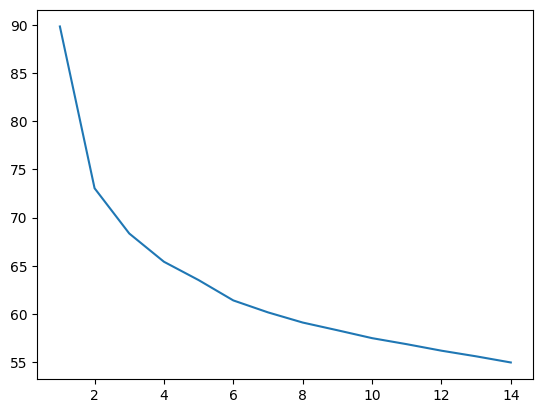

In [340]:
num_clusters = []
score = []
for cluster_count in range(1,15):
    kmeans = KMeans(cluster_count, n_init='auto')
    kmeans.fit(vector_df)
    kmeans.score(vector_df)
    num_clusters.append(cluster_count)
    # score.append(kmeans.score(x)) # score is just the negative of inertia_
    score.append(kmeans.inertia_)

plt.plot(num_clusters, score)

In [341]:
print(kmeans.score(vector_df))
kmeans.inertia_

-54.94856117115834


54.94856117115834

In [342]:
# Alternative way of listing labels for the training data
kmeans.labels_

array([12, 11,  4, ..., 12,  3, 10])

##### Silhouette Plot  
The silhouette plot is a measure of how close each point in one cluster is to points in the neighboring clusters.  It provides a visual way to assess parameters such as the number of clusters visually.  It does so using the silhouette coefficient.

Silhouette coefficient - This measure has a range of [-1, 1].  Higher the score the better, so +1 is the best result.

The silhouette coefficient is calculated individually for every observation in a cluster as follows:  (b - a) / max(a, b). 'b' is the distance between a sample and the nearest cluster that the sample is not a part of.  'a' is the distance between the sample and the cluster it is a part of.  One would expect b - a to be a positive number, but if it is not, then likely the point is misclassified.

`sklearn.metrics.silhouette_samples(X)` - gives the silhouette coefficient for every point in X.  
`sklearn.metrics.silhouette_score(X)` - gives mean of the above.

The silhouette plot gives the mean (ie silhouette_score) as a red vertical line for the entire dataset for all clusters.  Then each cluster is presented as a sideways histogram of the distances of each of the datapoints.  The fatter the representation of a cluster, the more datapoints are included in that cluster. 

Negative points on the histogram indicate misclassifications that may be difficult to correct as moving them changes the centroid center.



For n_clusters = 2 The average silhouette_score is : 0.1654823807181713
For n_clusters = 3 The average silhouette_score is : 0.0989183742306669
For n_clusters = 4 The average silhouette_score is : 0.08460147208673717
For n_clusters = 5 The average silhouette_score is : 0.07273914324218939
For n_clusters = 6 The average silhouette_score is : 0.0644064989776713


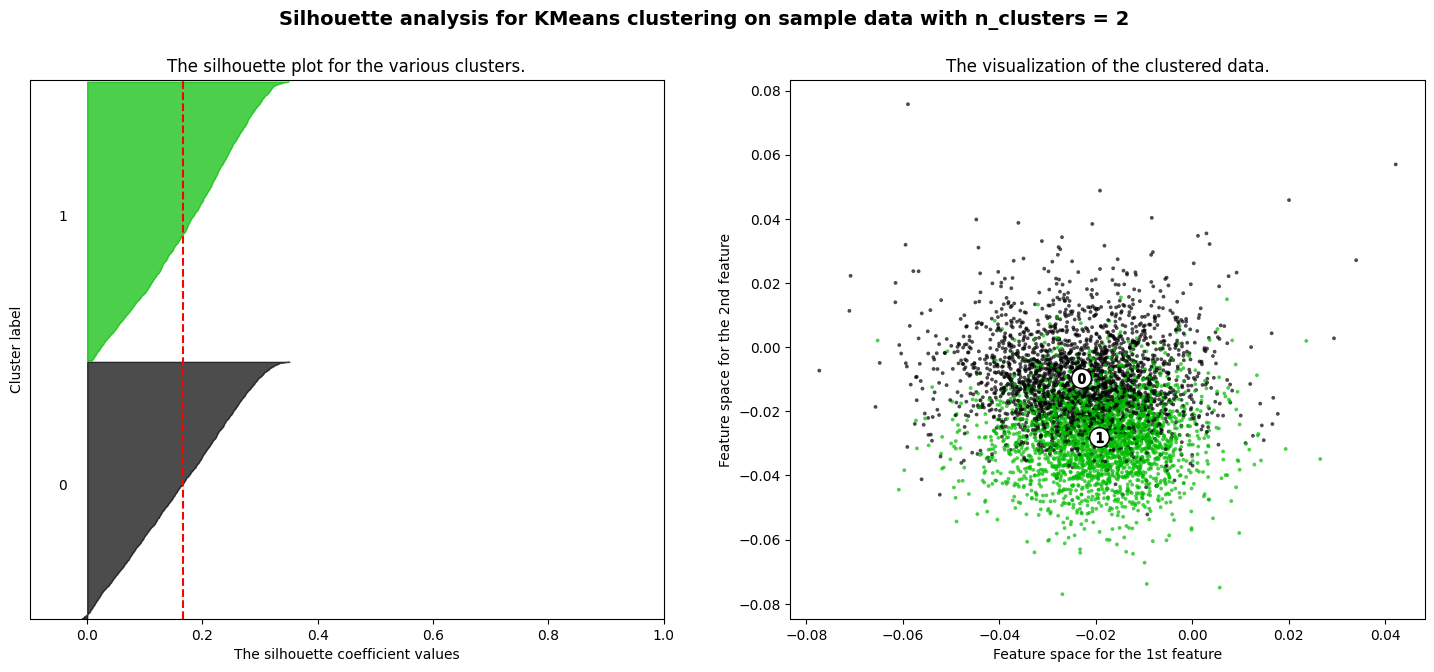

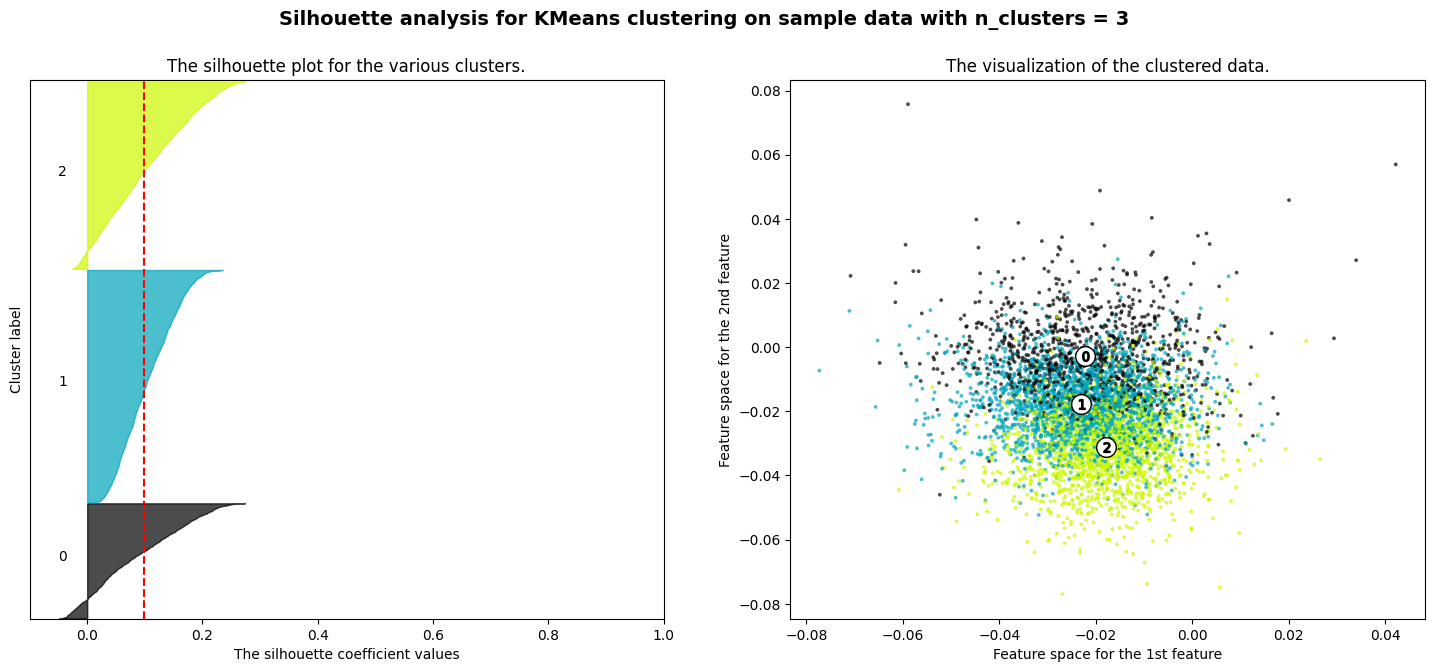

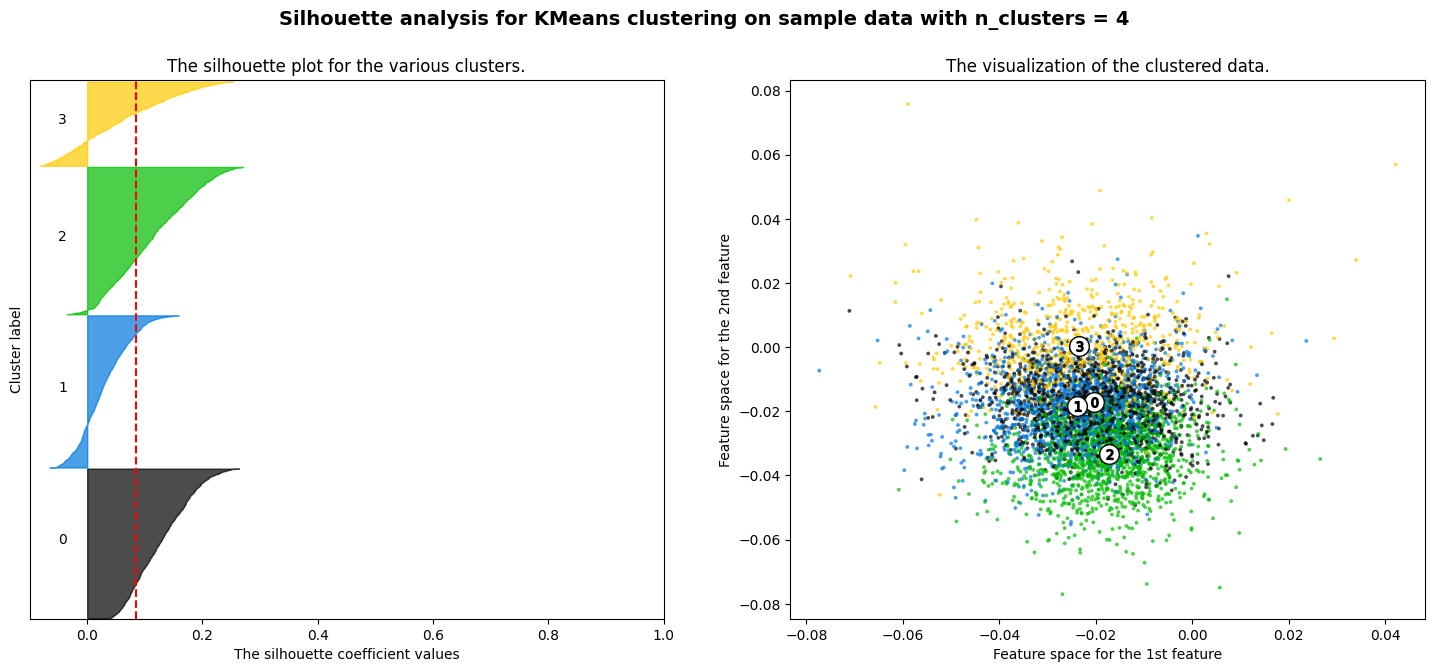

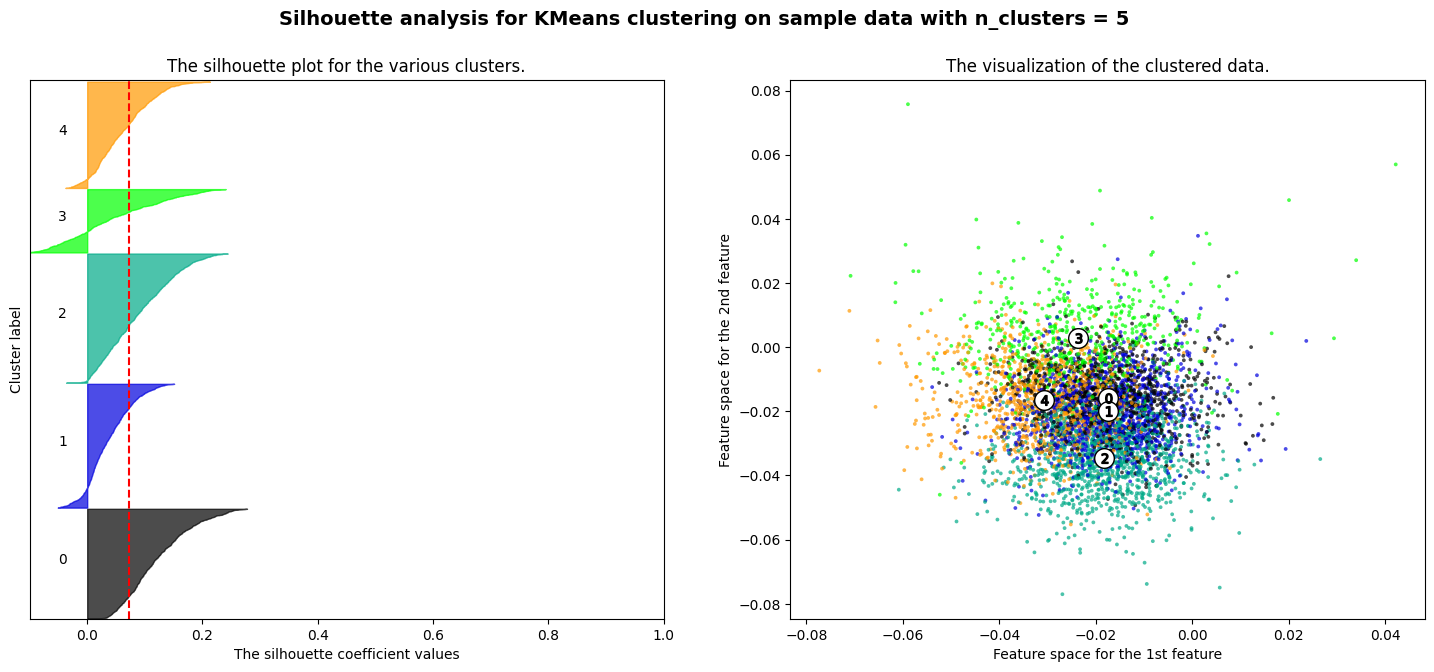

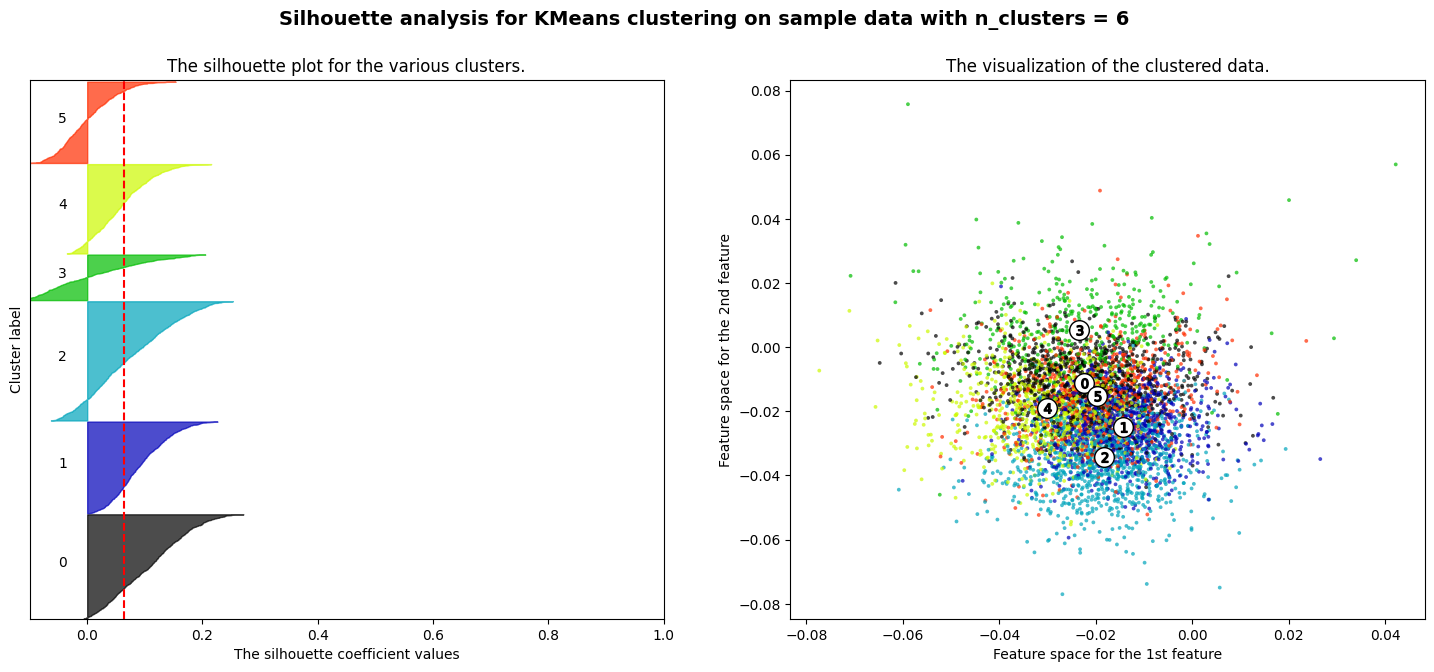

In [343]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

x= vector_df

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        np.array(x)[:, 0], np.array(x)[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Classification using Word2Vec

In [355]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [377]:
df.review.str.split()

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [378]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=df.review.str.split(), vector_size=100)

CPU times: total: 19.3 s
Wall time: 29.8 s


In [379]:
# Convert each review to a vector - these will be our 'features', or X
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in (df.review):
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(50000, 100)

In [380]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.sentiment.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [367]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector_df, y, test_size = 0.20)


In [371]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking accuracy on the training set

In [372]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19973
           1       0.96      0.96      0.96     20027

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



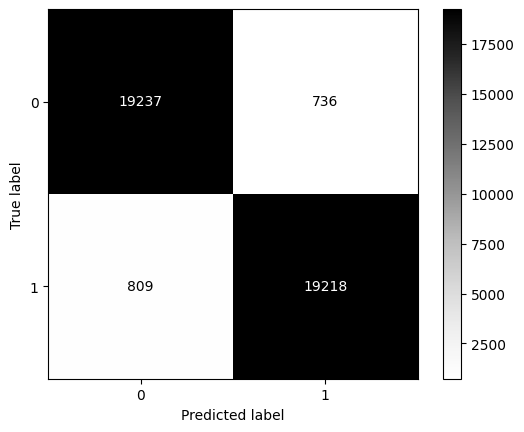

In [373]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [374]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.17 , 0.83 ],
       [0.012, 0.988],
       [0.005, 0.995],
       ...,
       [0.025, 0.975],
       [0.929, 0.071],
       [0.492, 0.508]], dtype=float32)

#### Checking accuracy on the test set

In [375]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5027
           1       0.82      0.82      0.82      4973

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



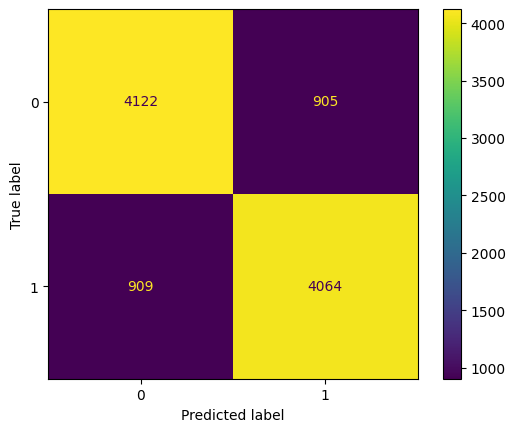

In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);